In [2]:
# -*- coding: utf-8 -*-
"""Example of using XGBOD for outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_X_y
from scipy.io import loadmat

from pyod.models.xgbod import XGBOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [3]:
if __name__ == "__main__":
    # Define data file and read X and y
    # Generate some data if the source data is missing
    mat_file = 'cardio.mat'
    try:
        mat = loadmat(os.path.join('data', mat_file))

    except TypeError:
        print('{data_file} does not exist. Use generated data'.format(
            data_file=mat_file))
        X, y = generate_data(train_only=True)  # load data
    except IOError:
        print('{data_file} does not exist. Use generated data'.format(
            data_file=mat_file))
        X, y = generate_data(train_only=True)  # load data
    else:
        X = mat['X']
        y = mat['y'].ravel()
        X, y = check_X_y(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=42)

cardio.mat does not exist. Use generated data


In [4]:
    # train XGBOD detector
    clf_name = 'XGBOD'
    clf = XGBOD(random_state=42)
    clf.fit(X_train, y_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores


c:\python37\lib\site-packages\pyod\models\base.py:344: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  F

In [7]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)
    
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

for i in range(y_test.size):
    if(y_test[i] == 1 and y_test_pred[i] == 1):
        truePositive = truePositive+1
    elif (y_test[i] == 0 and y_test_pred[i] == 0):
        trueNegative = trueNegative+1
    elif (y_test[i] == 0 and y_test_pred[i] == 1):
        falsePositive = falsePositive+1
    else:
        falseNegative = falseNegative+1

print()
print("Confusion Matrix")
print(truePositive, " | ", falsePositive)
print(falseNegative, " | ", trueNegative,"\n")


On Training Data:
XGBOD ROC:1.0, precision @ rank n:1.0

On Test Data:
XGBOD ROC:1.0, precision @ rank n:1.0

Confusion Matrix
42  |  0
1  |  357 



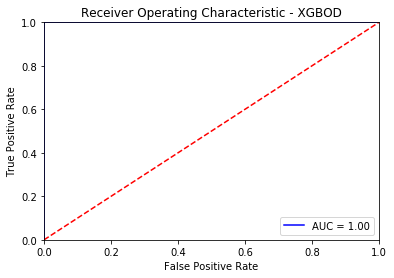

In [9]:
    #####################################################################

    import sklearn.metrics as metrics

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_scores)
    roc_auc = metrics.auc(fpr, tpr)

    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic - '+clf_name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()